[17.80167472 49.87918415 72.07750943]


ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

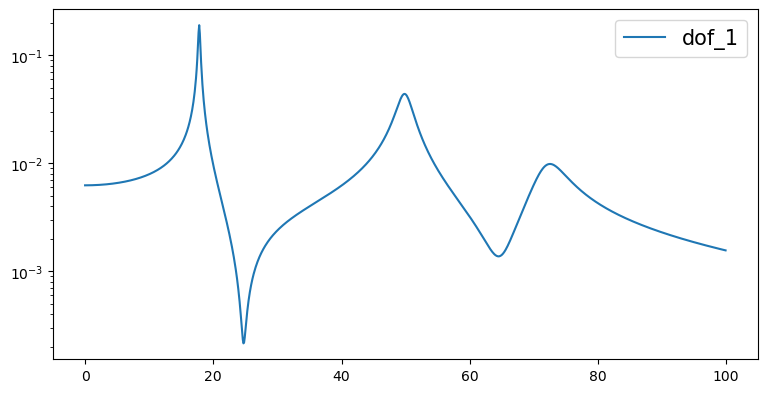

In [1]:
# Frequency Response of MDOF
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import linalg
from numpy.linalg import inv
import cmath
m0, m1, m2 = (1, 1, 1)
k0, k1, k2 = (1600, 1600, 1600)
alpha, beta = 0.001,0.001

c1 = 10
c2 = 50
c3 = 10
c4 = 2

x = 0
y = 1
z = complex(x,y)

w = np.arange(0,100,0.1)
x1 = []
x2 = []
x3 = []
W = []
for i in w:
    M = np.array([[m0, 0, 0],
                  [0, m1, 0],
                  [0, 0, m2]])
    K = np.array([[k0+k1, -k1,   0],
                  [-k1, k1+k2, -k2],
                  [0,     -k2,  k2]])
    C = alpha*M + beta*K
    F = np.array([[10],
                  [0],
                  [0]])
 
    D = np.array(K- i**2*M - i*z*C)
    B = inv(D).dot(F)
    x1.append(abs(B[0]))
    x2.append(abs(B[1]))
    x3.append(abs(B[2]))
    W.append(i)

u,v = linalg.eigh(K,M)
nat_fre = np.sqrt(u)
print(nat_fre)

plt.figure(figsize=(20,10))


plt.subplot(2,2,1)
plt.plot(W,x1,label = 'dof_1')
plt.legend(loc = "best",fontsize = 15)
plt.yscale("log")
plt.grid(b=True, which='both', color='0.5', linestyle='--')
#plt.ticklabel_format(style = 'sci',scilimits = (1,1),axis = 'y')
plt.xlim(W[0],W[-1])
#plt.ylim(1e-2,10.5)
plt.title("Frequency Response of MDOF",fontsize = 20)
plt.xlabel("Frequency Hz",fontsize = 15)
plt.ylabel("Amplitude",fontsize = 15)
plt.tight_layout(pad=3)

plt.subplot(2,2,2)
plt.plot(W,x2,label = 'dof_2')
plt.legend(loc = "best",fontsize = 15)
plt.yscale("log")
plt.grid(b=True, which='both', color='0.5', linestyle='--')
#plt.ticklabel_format(style = 'sci',scilimits = (1,1),axis = 'y')
plt.xlim(W[0],W[-1])
#plt.ylim(1e-2,10.5)
plt.title("Frequency Response of MDOF",fontsize = 20)
plt.xlabel("Frequency Hz",fontsize = 15)
plt.ylabel("Amplitude",fontsize = 15)

plt.tight_layout(pad=3)

plt.subplot(2,2,3)
plt.plot(W,x3,label = 'dof_3')
plt.legend(loc = "best",fontsize = 15)
plt.yscale("log")
plt.grid(b=True, which='both', color='0.5', linestyle='--')
#plt.ticklabel_format(style = 'sci',scilimits = (1,1),axis = 'y')
plt.xlim(W[0],W[-1])
#plt.ylim(1e-2,10.5)
plt.title("Frequency Response of MDOF",fontsize = 20)
plt.xlabel("Frequency Hz",fontsize = 15)
plt.ylabel("Amplitude",fontsize = 15)
plt.show()


